In [1]:
import findspark

In [2]:
findspark.init()

In [3]:
import pyspark
sc = pyspark.SparkContext()

In [4]:
sc

In [5]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [6]:
sqlContext = SQLContext(sc)

# Exploring and analysing the dataset

In [7]:
df = sqlContext.read.csv('marketing_pax.csv', header=True, sep='^', inferSchema=True)

In [8]:
df.count()

9546302

In [9]:
df.printSchema()

root
 |-- rloc: string (nullable = true)
 |-- full_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- date_of_birth: timestamp (nullable = true)
 |-- document_type: string (nullable = true)
 |-- document_number: string (nullable = true)
 |-- document_country: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- fqtv_data: string (nullable = true)
 |-- general_status: string (nullable = true)
 |-- boarding_status: string (nullable = true)
 |-- acceptance_status: string (nullable = true)
 |-- bag_status: string (nullable = true)
 |-- customer_accepted: string (nullable = true)
 |-- checkin_location: string (nullable = true)
 |-- boarded_in_all_legs_flag: boolean (nullable = true)
 |-- cabin_code: string (nullable = true)
 |-- booking_class_code: string (nullable = true)
 |-- airline_code: string (nullable = true)
 |-- flight_number: string (nullable = true)
 |-- departure_date_leg: timestamp (nullable = true)


In [10]:
len(df.columns), df.columns

(66,
 ['rloc',
  'full_name',
  'gender',
  'age',
  'date_of_birth',
  'document_type',
  'document_number',
  'document_country',
  'nationality',
  'fqtv_data',
  'general_status',
  'boarding_status',
  'acceptance_status',
  'bag_status',
  'customer_accepted',
  'checkin_location',
  'boarded_in_all_legs_flag',
  'cabin_code',
  'booking_class_code',
  'airline_code',
  'flight_number',
  'departure_date_leg',
  'quality_index',
  'creation_date',
  'advance_purchase',
  'creator_office_id',
  'creator_iata_number',
  'creator_gds_code',
  'creator_city_code',
  'creator_lat',
  'creator_lon',
  'creator_country_code',
  'creator_continent_name',
  'creator_channel_code',
  'booking_status_code',
  'cabin_code_seg',
  'booking_class_code_seg',
  'pos_office_id',
  'pos_iata_number',
  'pos_gds_code',
  'pos_city_code',
  'pos_lat',
  'pos_lon',
  'pos_country_code',
  'pos_continent_code',
  'pos_channel_code',
  'board_point',
  'board_lat',
  'board_lon',
  'board_country_code'

In [11]:
df.select('gender', 'age').show(5)

+------+----+
|gender| age|
+------+----+
|     F|null|
|     M|null|
|     M|  33|
|     F|  40|
|     F|null|
+------+----+
only showing top 5 rows



In [12]:
df.select('rloc').show(5)

+------+
|  rloc|
+------+
|60Z666|
|612666|
|818666|
|827666|
|8PD666|
+------+
only showing top 5 rows



In [13]:
df.select('Document_number').show(5)

+---------------+
|Document_number|
+---------------+
|           null|
|           null|
|      39939WV44|
|       5719T651|
|           null|
+---------------+
only showing top 5 rows



In [14]:
import pandas as pd
import requests

In [15]:
df.groupBy('rloc').count().show(10)

+------+-----+
|  rloc|count|
+------+-----+
|MW0669|    2|
|DKA66P|    4|
|MIJ66V|    2|
|ARB66H|    4|
|9KS66J|    2|
|NFB66J|    8|
|ZJD66K|    8|
|JFB676|    4|
|JWJ670|    4|
|KW3670|    6|
+------+-----+
only showing top 10 rows



In [16]:
from pyspark.sql import *
from pyspark.sql.functions import *

In [17]:
df.agg(countDistinct(df.rloc)).show()

+--------------------+
|count(DISTINCT rloc)|
+--------------------+
|             2605835|
+--------------------+



In [18]:
#contamos el número de billetes existente (hay muchos null)
df.filter(df.document_number.isNotNull()).count()

2636677

# Cleansing and preparing the dataset

In [19]:
#creamos el dataframe vuelos
df.createOrReplaceTempView("vuelos")

In [20]:
#contamos el número de billetes existente (hay muchos null)
sqlDF = sqlContext.sql("SELECT COUNT(document_number) FROM vuelos WHERE document_number IS NOT NULL")

In [21]:
sqlDF.show()

+----------------------+
|count(document_number)|
+----------------------+
|               2636677|
+----------------------+



In [22]:
sqlDF = sqlContext.sql("SELECT COUNT(*), COUNT(DISTINCT rloc) FROM vuelos")

In [23]:
sqlDF.show()

+--------+--------------------+
|count(1)|count(DISTINCT rloc)|
+--------+--------------------+
| 9546302|             2605835|
+--------+--------------------+



In [24]:
#departure_date_leg count
sqlDF = sqlContext.sql("SELECT COUNT(departure_date_leg) FROM vuelos")

In [25]:
sqlDF.show()

+-------------------------+
|count(departure_date_leg)|
+-------------------------+
|                  9546300|
+-------------------------+



In [26]:
df.createOrReplaceTempView("fechas_salida_vuelos")

In [27]:
#departure_date_leg count

sqlDF = sqlContext.sql(sqlQuery="select departure_date_leg, count(*)\
from vuelos group by departure_date_leg order by 1")

In [28]:
sqlDF.orderBy(desc("departure_date_leg")).show(150)
#selecciono hasta el 01/01/2014 

+--------------------+--------+
|  departure_date_leg|count(1)|
+--------------------+--------+
|2014-07-14 00:00:...|       1|
|2014-06-04 00:00:...|       1|
|2014-05-02 00:00:...|       1|
|2014-04-30 00:00:...|       2|
|2014-04-29 00:00:...|       1|
|2014-04-26 00:00:...|       6|
|2014-04-14 00:00:...|       7|
|2014-04-13 00:00:...|       1|
|2014-04-12 00:00:...|       4|
|2014-04-11 00:00:...|       3|
|2014-04-10 00:00:...|       3|
|2014-04-09 00:00:...|      28|
|2014-04-08 00:00:...|    9273|
|2014-04-07 00:00:...|   12259|
|2014-04-06 00:00:...|   14274|
|2014-04-05 00:00:...|   13120|
|2014-04-04 00:00:...|   20702|
|2014-04-03 00:00:...|   19973|
|2014-04-02 00:00:...|   17897|
|2014-04-01 00:00:...|   16563|
|2014-03-31 00:00:...|   19681|
|2014-03-30 00:00:...|   20607|
|2014-03-29 00:00:...|   18637|
|2014-03-28 00:00:...|   23506|
|2014-03-27 00:00:...|   22086|
|2014-03-26 00:00:...|   19947|
|2014-03-25 00:00:...|   18963|
|2014-03-24 00:00:...|   21594|
|2014-03

In [29]:
sqlDF.orderBy(asc("departure_date_leg")).show(100)
#veo que a partir del 01/01/2013 hay más volumen de datos

+--------------------+--------+
|  departure_date_leg|count(1)|
+--------------------+--------+
|                null|       2|
|2012-06-27 00:00:...|       1|
|2012-07-05 00:00:...|       2|
|2012-07-12 00:00:...|       2|
|2012-07-14 00:00:...|       2|
|2012-07-15 00:00:...|       2|
|2012-07-19 00:00:...|       1|
|2012-07-22 00:00:...|       1|
|2012-07-23 00:00:...|       2|
|2012-08-01 00:00:...|       4|
|2012-08-03 00:00:...|       1|
|2012-08-06 00:00:...|      32|
|2012-08-09 00:00:...|       1|
|2012-08-16 00:00:...|       5|
|2012-08-20 00:00:...|       4|
|2012-08-23 00:00:...|       1|
|2012-08-24 00:00:...|       1|
|2012-08-30 00:00:...|       2|
|2012-09-03 00:00:...|       1|
|2012-09-04 00:00:...|       4|
|2012-09-10 00:00:...|       2|
|2012-09-12 00:00:...|       1|
|2012-09-15 00:00:...|       2|
|2012-09-16 00:00:...|       2|
|2012-09-18 00:00:...|       2|
|2012-09-19 00:00:...|       1|
|2012-09-20 00:00:...|       3|
|2012-09-30 00:00:...|       2|
|2012-10

In [30]:
sqlDF.select(last('departure_date_leg', ignorenulls=True)).show()

+------------------------------+
|last(departure_date_leg, true)|
+------------------------------+
|          2014-07-14 00:00:...|
+------------------------------+



In [31]:
sqlDF.select(first('departure_date_leg', ignorenulls=True)).show()

+-------------------------------+
|first(departure_date_leg, true)|
+-------------------------------+
|           2012-06-27 00:00:...|
+-------------------------------+



In [32]:
fechas_vuelos = df.groupBy(df['departure_date_leg']).count().toPandas().sort_values(by='count', ascending=False)

In [33]:
vuelos_por_fecha = pd.DataFrame(fechas_vuelos)

In [34]:
vuelos_por_fecha.sort_values('count')

,departure_date_leg,count
239,2012-12-16,1
176,2012-07-22,1
57,2012-07-19,1
477,2014-04-29,1
6,2012-12-05,1
427,2014-07-14,1
542,2012-12-25,1
254,2014-05-02,1
404,2012-12-23,1
399,2012-11-04,1


In [35]:
#vemos dónde empieza a haber un volumen de datos más homogéneo
vuelos_por_fecha.nsmallest(100, 'count')

,departure_date_leg,count
176,2012-07-22,1
57,2012-07-19,1
477,2014-04-29,1
6,2012-12-05,1
427,2014-07-14,1
542,2012-12-25,1
254,2014-05-02,1
404,2012-12-23,1
399,2012-11-04,1
393,2012-06-27,1


In [36]:
vuelos_por_fecha.nlargest(150, 'count')

,departure_date_leg,count
253,2013-04-26,26695
376,2013-06-14,26382
319,2013-03-22,26259
222,2013-04-19,25497
359,2013-10-18,25483
455,2013-09-20,25385
208,2014-02-28,25293
36,2013-04-12,25237
175,2013-04-25,25123
502,2014-03-14,25050


In [37]:
#acotamos los datos al rango de fechas con un volumen homogéneo: 365 días
sqlDF2 = sqlContext.sql(sqlQuery="select * from vuelos where departure_date_leg between '2013-01-01' and '2014-01-01'\
and document_number is not null \
and booking_status_code='HK'\
and quality_index = 1")

In [38]:
sqlDF2.registerTempTable("vuelos_clientes")

In [39]:
sqlDF2.count()

526851

In [40]:
sqlDF2.agg(countDistinct(sqlDF2.document_number)).show()

+-------------------------------+
|count(DISTINCT document_number)|
+-------------------------------+
|                         175817|
+-------------------------------+



In [41]:
sqlDF2.groupBy('document_number').count().show(10)

+---------------+-----+
|document_number|count|
+---------------+-----+
|      66289BS28|    2|
|      708061476|    4|
|      20571FT30|    3|
|       69155025|    2|
|      991926414|    2|
|       78642406|    4|
|      97657BL93|   15|
|       41748915|    3|
|      31068BM21|    2|
|      15064BY96|    2|
+---------------+-----+
only showing top 10 rows



In [42]:
#documentos únicos
sqlDF3 = sqlContext.sql(sqlQuery="select document_number, count(*) \
from (select document_number, gender, date_of_birth, nationality, count(*) as count \
from vuelos_clientes group by document_number, gender, date_of_birth, nationality) as a group by document_number \
having count(*)=1")


In [43]:
#vemos que ya no hay documentos duplicados
sqlDF3.groupBy('document_number').count().show(10)

+---------------+-----+
|document_number|count|
+---------------+-----+
|       78642406|    1|
|       2828Y769|    1|
|      XP325ZZ17|    1|
|      33772PI56|    1|
|      02376W459|    1|
|      29318BV96|    1|
|      9115254OW|    1|
|      770625469|    1|
|      71263FW84|    1|
|      08869BO31|    1|
+---------------+-----+
only showing top 10 rows



In [44]:
sqlDF3.count()

175333

In [45]:
sqlDF3.registerTempTable("documentos_unicos")

In [46]:
sqlDF4 = sqlContext.sql(sqlQuery = "select a.* from vuelos_clientes \
as a inner join documentos_unicos as b on a.document_number = b.document_number")

In [47]:
sqlDF4.registerTempTable("clientes_unicos")

In [48]:
clientes_unicos = sqlDF4.toPandas()

In [49]:
clientes_unicos.to_csv('clientes_unicos.csv', sep=',')

In [50]:
sqlDF4.count()

523541

In [51]:
sqlDF4.agg(countDistinct(sqlDF4.document_number)).show()

+-------------------------------+
|count(DISTINCT document_number)|
+-------------------------------+
|                         175333|
+-------------------------------+



In [52]:
sqlDF4.groupBy('document_number').count().show(10)

+---------------+-----+
|document_number|count|
+---------------+-----+
|      000744336|    2|
|      00152Y444|    2|
|      002946569|    4|
|      00453BS41|    1|
|      00517BF34|    2|
|      00714BO74|    2|
|      00908BD78|    2|
|      01060BK97|    2|
|      013178711|    4|
|      01651Y243|    4|
+---------------+-----+
only showing top 10 rows



## Preparing the dataframe for the clustering

In [53]:
#creamos las columnas que nos interesan
sqlDF6 = sqlContext.sql(sqlQuery="select document_number,\
count(distinct(concat(document_number, ',', rloc))) as frecuency, \
datediff(to_date('2014-01-01 00:00:00'), to_date(max(departure_date_leg))) as recency, \
sum(revenue_amount_seg) as money \
from clientes_unicos group by document_number")

In [54]:
sqlDF6.registerTempTable('rfm_doc_unicos')

In [55]:
sqlDF6.select('frecuency', 'recency', 'money', 'document_number').show(5)

+---------+-------+------+---------------+
|frecuency|recency| money|document_number|
+---------+-------+------+---------------+
|        1|     28|221.26|      000744336|
|        1|    171| 205.0|      00152Y444|
|        1|    282|291.68|      002946569|
|        1|     22|250.51|      00453BS41|
|        1|     32| 313.0|      00517BF34|
+---------+-------+------+---------------+
only showing top 5 rows



In [56]:
from pyspark.sql import HiveContext

In [57]:
sqlContext = HiveContext(sc)

In [58]:
hive_context = HiveContext(sc)

# RFM

#### After creating the dataframe with the neccesary columns, we are going to perform an analysis on the data obtained, in order to cluster the potential clients and study their behaviour

In [59]:
from pyspark.ml.clustering import KMeans

In [105]:
dataset_rfm = hive_context.table('rfm_doc_unicos')

In [61]:
dataset_rfm.show()

+---------------+---------+-------+------------------+
|document_number|frecuency|recency|             money|
+---------------+---------+-------+------------------+
|      000744336|        1|     28|            221.26|
|      00152Y444|        1|    171|             205.0|
|      002946569|        1|    282|            291.68|
|      00453BS41|        1|     22|            250.51|
|      00517BF34|        1|     32|             313.0|
|      00714BO74|        1|     32|             313.0|
|      00908BD78|        1|    197|             266.0|
|      01060BK97|        1|     35|               0.0|
|      013178711|        1|    328|151.03999999999996|
|      01651Y243|        1|    113|504.15999999999997|
|      017118282|        1|    307|             248.3|
|       01795150|        1|     99|             121.0|
|      02054BY00|        1|     49|               0.0|
|      02240BO12|        1|     52|              82.5|
|      02376W459|        1|     26|              2.96|
|      024

In [106]:
cols = dataset_rfm.columns

In [107]:
from pyspark.sql.types import DoubleType

In [108]:
dataset_rfm.frecuency.cast("integer").alias('frecuencies')

Column<CAST(frecuency AS INT) AS `frecuencies`>

In [109]:
dataset_rfm.dtypes

[('document_number', 'string'),
 ('frecuency', 'bigint'),
 ('recency', 'int'),
 ('money', 'double')]

In [66]:
dataset_rfm.head()

Row(document_number=u'000744336', frecuency=1, recency=28, money=221.26)

In [67]:
dataset_rfm.count()

175333

In [68]:
import pandas as pd
import numpy as np

In [110]:
numericCols = ['frecuency', 'recency', 'money']

In [111]:
rfm = dataset_rfm[numericCols]

In [112]:
rfm.dtypes

[('frecuency', 'bigint'), ('recency', 'int'), ('money', 'double')]

In [72]:
##rfm_final = rfm.withColumn('avgmoney', rfm.money / rfm.frecuency)

In [73]:
rfm.fillna(0)

DataFrame[frecuency: bigint, recency: int, money: double]

In [74]:
rfm.describe().show()

+-------+------------------+------------------+-----------------+
|summary|         frecuency|           recency|            money|
+-------+------------------+------------------+-----------------+
|  count|            175333|            175333|           175333|
|   mean|1.2120764488145415| 134.6600639925171|540.5984852252573|
| stddev|0.7551303980127374|106.08618852812808|938.4173226041892|
|    min|                 1|                 1|              0.0|
|    max|                22|               365|          38767.9|
+-------+------------------+------------------+-----------------+



In [76]:
from pyspark.sql.functions import stddev_pop, avg, broadcast

In [77]:
cols = rfm.columns

In [78]:
stats = (rfm.groupBy().agg(*([stddev_pop(x).alias(x + '_stddev') for x in cols] + [avg(x).alias(x + '_avg') for x in cols])))




In [79]:
rfm.dtypes

[('frecuency', 'bigint'), ('recency', 'int'), ('money', 'double')]

In [80]:
rfm = rfm.crossJoin(broadcast(stats))

In [81]:
rfm.dtypes

[('frecuency', 'bigint'),
 ('recency', 'int'),
 ('money', 'double'),
 ('frecuency_stddev', 'double'),
 ('recency_stddev', 'double'),
 ('money_stddev', 'double'),
 ('frecuency_avg', 'double'),
 ('recency_avg', 'double'),
 ('money_avg', 'double')]

In [82]:
exprs = [(rfm[x] - rfm[x + '_avg']) / rfm[x + '_stddev'] for x in cols]

In [83]:
rfm.select(exprs).show()

+------------------------------------------------+------------------------------------------+------------------------------------+
|((frecuency - frecuency_avg) / frecuency_stddev)|((recency - recency_avg) / recency_stddev)|((money - money_avg) / money_stddev)|
+------------------------------------------------+------------------------------------------+------------------------------------+
|                             -0.2808482537018044|                       -1.0054123881526456|                 -0.3402957172676322|
|                             -0.2808482537018044|                       0.34255203380677673|                 -0.3576228125560959|
|                             -0.2808482537018044|                        1.3888740676354192|                 -0.2652542627649498|
|                             -0.2808482537018044|                       -1.0619703359271668|                -0.30912612703469466|
|                             -0.2808482537018044|                       -0.9677070

In [84]:
rfm.show()

+---------+-------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+
|frecuency|recency|             money|  frecuency_stddev|    recency_stddev|     money_stddev|     frecuency_avg|      recency_avg|        money_avg|
+---------+-------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+
|        1|     28|            221.26|0.7551282445918905|106.08588599996797|938.4146465002593|1.2120764488145415|134.6600639925171|540.5984852252573|
|        1|    171|             205.0|0.7551282445918905|106.08588599996797|938.4146465002593|1.2120764488145415|134.6600639925171|540.5984852252573|
|        1|    282|            291.68|0.7551282445918905|106.08588599996797|938.4146465002593|1.2120764488145415|134.6600639925171|540.5984852252573|
|        1|     22|            250.51|0.7551282445918905|106.08588599996797|938.4146465002593|1.2120

In [85]:
rfm_final = rfm.select(exprs).toPandas()

In [86]:
rfm_final.head(2)

,((frecuency - frecuency_avg) / frecuency_stddev),((recency - recency_avg) / recency_stddev),((money - money_avg) / money_stddev)
0,-0.280848,-1.005412,-0.340296
1,-0.280848,0.342552,-0.357623


In [87]:
rfm_final.columns = ['frecuency_scaled', 'recency_scaled', 'money_scaled']

In [88]:
rfm_final.head(2)

,frecuency_scaled,recency_scaled,money_scaled
0,-0.280848,-1.005412,-0.340296
1,-0.280848,0.342552,-0.357623


In [89]:
from numpy import array
from math import sqrt
from pyspark.ml.clustering import KMeans, KMeansModel

In [90]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [91]:
kmeans = KMeans(n_clusters= 4)

In [92]:
clusters = kmeans.fit_predict(rfm_final)

In [93]:
rfm_final['cluster'] = clusters

In [94]:
rfm_final.head(5)

,frecuency_scaled,recency_scaled,money_scaled,cluster
0,-0.280848,-1.005412,-0.340296,1
1,-0.280848,0.342552,-0.357623,2
2,-0.280848,1.388874,-0.265254,2
3,-0.280848,-1.061970,-0.309126,1
4,-0.280848,-0.967707,-0.242535,1


In [95]:
rfm.toPandas()

,frecuency,recency,money,frecuency_stddev,recency_stddev,money_stddev,frecuency_avg,recency_avg,money_avg
0,1,28,221.26,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
1,1,171,205.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
2,1,282,291.68,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
3,1,22,250.51,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
4,1,32,313.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
5,1,32,313.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
6,1,197,266.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
7,1,35,0.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
8,1,328,151.04,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
9,1,113,504.16,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485


In [113]:
dataset_rfm = dataset_rfm.toPandas()

In [114]:
dataset_rfm['cluster'] = rfm_final['cluster']

In [115]:
dataset_rfm.head(2)

,document_number,frecuency,recency,money,cluster
0,000744336,1,28,221.26,1
1,00152Y444,1,171,205.00,2


In [116]:
%matplotlib inline

In [117]:
plt.isinteractive()

True

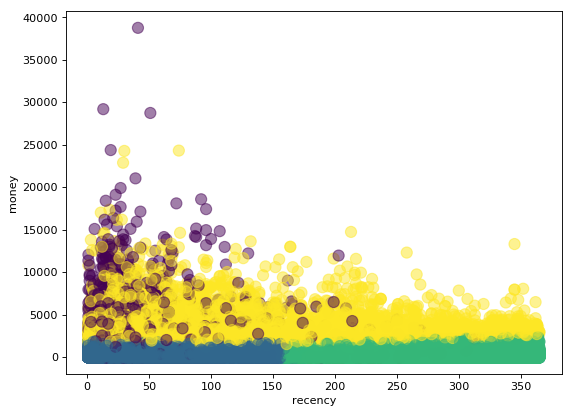

In [118]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset_rfm['recency'],dataset_rfm['money'],alpha = 0.5,c=dataset_rfm['cluster'],s=100)
plt.xlabel('recency')
plt.ylabel('money')
plt.show()

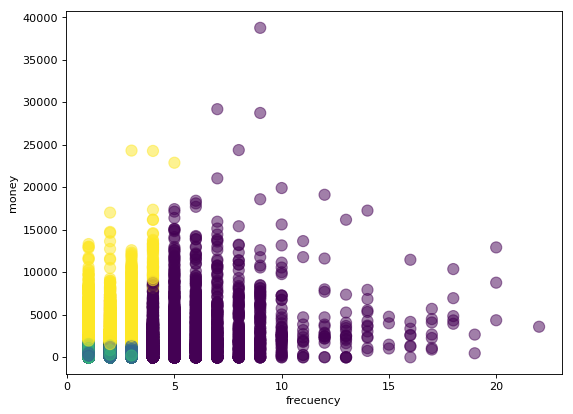

In [119]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset_rfm['frecuency'],dataset_rfm['money'],alpha = 0.5,c=dataset_rfm['cluster'],s=100)
plt.xlabel('frecuency')
plt.ylabel('money')
plt.show()

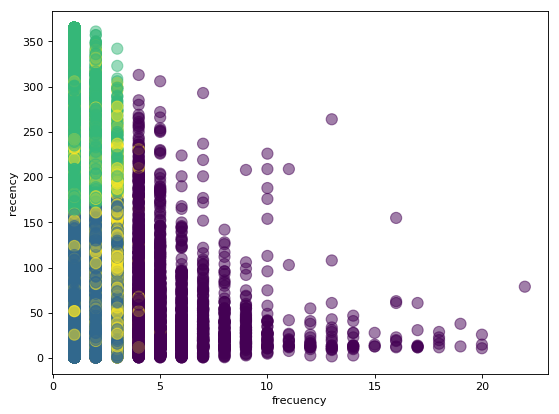

In [120]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset_rfm['frecuency'],dataset_rfm['recency'],alpha = 0.5,c=dataset_rfm['cluster'],s=100)
plt.xlabel('frecuency')
plt.ylabel('recency')
plt.show()

El cluster verde tiene una frecuencia de compra de 3 o menos veces y han pasado como mínimo 5 meses desde que se realizó la última compra (clientes desvinculados)
El cluster morado tiene frecuencia de compra de 4 o más veces en el año estudiado y la recencia varía desde 0 meses hasta 10 meses (clientes habituales)
El cluster azul tiene una frecuencia de entre 1 y 3 veces en el año y recencia de unos 5 meses (clientes vacacionales)
El clúster amarillo tiene una frecuencia de compra de entre 1 y 3 veces al año y una recencia que va desde 0 meses hasta casi el año.

In [121]:
rfm_csv = dataset_rfm.to_csv('rfm_with_clusters.csv', sep = ',')